# DMA818 Machine Learning Project
## Principal Component Analysis and Principal Component Regression on Boston Housing Dataset

**Student Name:** Edward Solomon Kweku Gyimah  
**Student ID:** SE/DAT/24/0007  
**Course:** DMA818 Machine Learning  
**Institution:** University of Cape Coast - School of Economics  
**Date:** September 2025  

### Project Objective
This project analyzes the Boston Housing dataset using Principal Component Analysis (PCA) to determine the optimal number of components for meaningful data representation, then builds a Principal Component Regression (PCR) model to predict median house prices.

## 1. Data Loading and Initial Exploration

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully")

Libraries imported successfully


In [24]:
# Load the Boston Housing dataset
data = pd.read_csv('BostonHousing.csv')

# Display basic information about the dataset
print("Boston Housing Dataset Overview")
print("=" * 40)
print(f"Dataset shape: {data.shape}")
print(f"\nColumn names and types:")
print(data.dtypes)
print(f"\nFirst 5 rows:")
data.head()

Boston Housing Dataset Overview
Dataset shape: (506, 14)

Column names and types:
CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object

First 5 rows:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [25]:
# Dataset description and summary statistics
print("Dataset Description:")
print("=" * 20)
print("CRIM: Per capita crime rate by town")
print("ZN: Proportion of residential land zoned for lots over 25,000 sq.ft")
print("INDUS: Proportion of non-retail business acres per town")
print("CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)")
print("NOX: Nitric oxides concentration (parts per 10 million)")
print("RM: Average number of rooms per dwelling")
print("AGE: Proportion of owner-occupied units built prior to 1940")
print("DIS: Weighted distances to employment centres")
print("RAD: Index of accessibility to radial highways")
print("TAX: Property tax rate per $10,000")
print("PTRATIO: Pupil-teacher ratio by town")
print("LSTAT: % lower status of the population")
print("MEDV: Median value of owner-occupied homes in $1000's (TARGET)")
print("CAT. MEDV: Categorical median value (0: ≤median, 1: >median)")

print("\nSummary Statistics:")
data.describe()

Dataset Description:
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq.ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX: Nitric oxides concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to employment centres
RAD: Index of accessibility to radial highways
TAX: Property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
LSTAT: % lower status of the population
MEDV: Median value of owner-occupied homes in $1000's (TARGET)
CAT. MEDV: Categorical median value (0: ≤median, 1: >median)

Summary Statistics:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [26]:
# Check for missing values and data quality
print("Data Quality Assessment:")
print("=" * 25)
print("Missing values per column:")
print(data.isnull().sum())
print(f"\nTotal missing values: {data.isnull().sum().sum()}")
print(f"Duplicate rows: {data.duplicated().sum()}")

Data Quality Assessment:
Missing values per column:
CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

Total missing values: 0
Duplicate rows: 0


## 2. Exploratory Data Analysis and Visualization

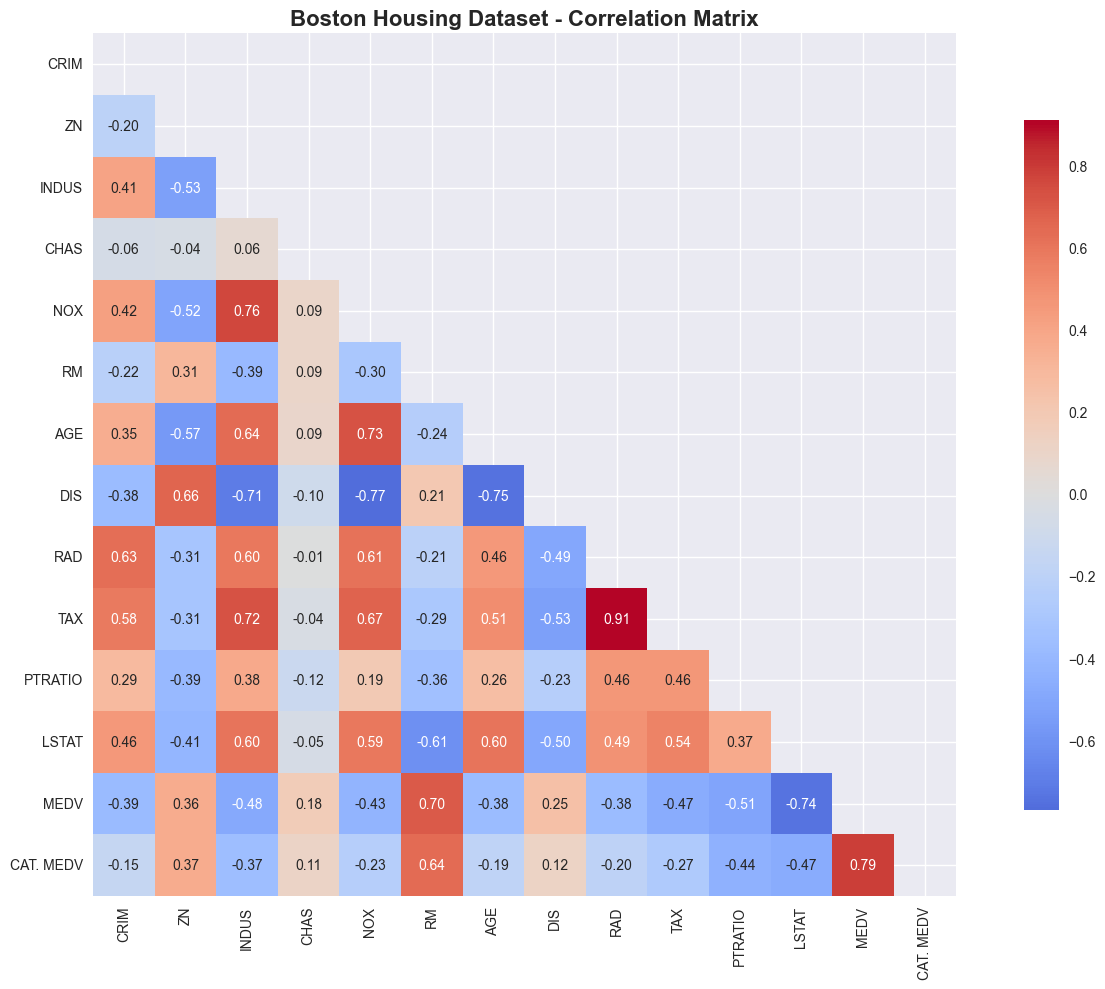

Features most correlated with MEDV (target):
CAT. MEDV    0.789789
LSTAT        0.737663
RM           0.695360
PTRATIO      0.507787
INDUS        0.483725
TAX          0.468536
NOX          0.427321
CRIM         0.388305
RAD          0.381626
AGE          0.376955
ZN           0.360445
DIS          0.249929
CHAS         0.175260
Name: MEDV, dtype: float64


In [27]:
# Correlation matrix visualization
plt.figure(figsize=(14, 10))
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Boston Housing Dataset - Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify highly correlated features with MEDV
medv_corr = correlation_matrix['MEDV'].abs().sort_values(ascending=False)
print("Features most correlated with MEDV (target):")
print(medv_corr[1:])  # Exclude MEDV itself

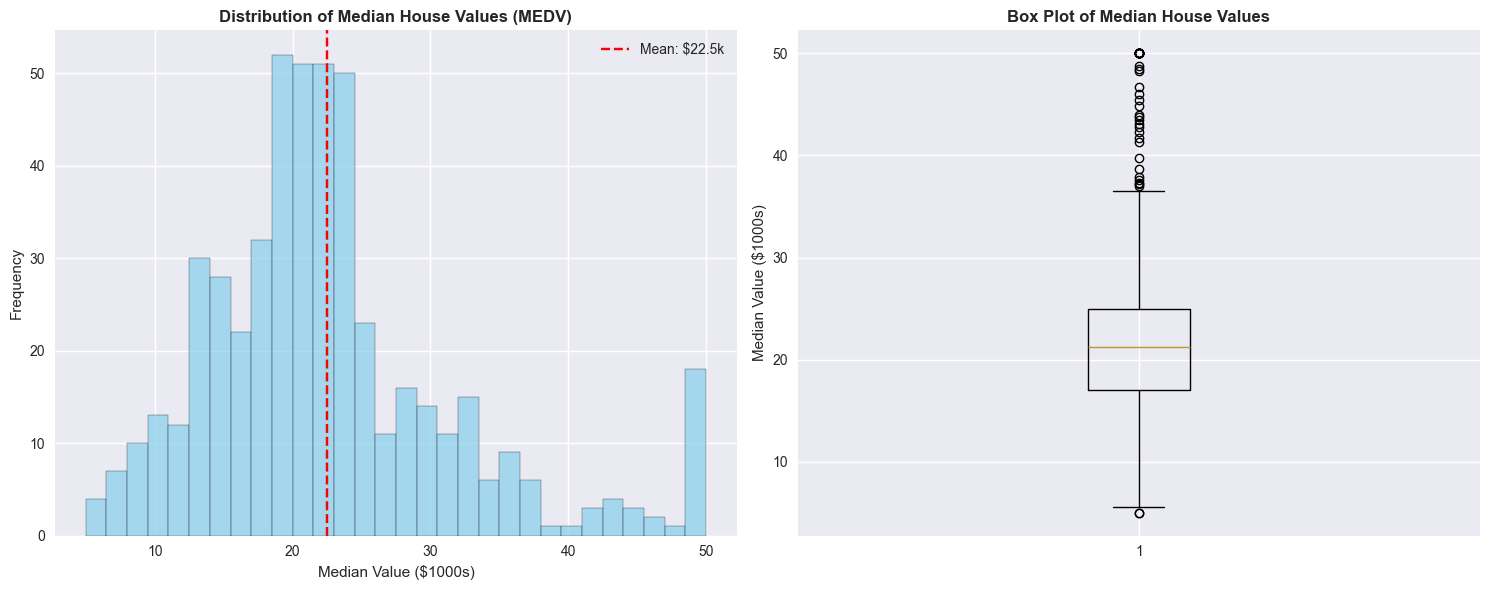

MEDV Statistics:
Mean: $22.53k
Median: $21.20k
Standard Deviation: $9.20k
Range: $5.0k - $50.0k


In [28]:
# Distribution of target variable (MEDV)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
axes[0].hist(data['MEDV'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Median House Values (MEDV)', fontweight='bold')
axes[0].set_xlabel('Median Value ($1000s)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(data['MEDV'].mean(), color='red', linestyle='--', label=f'Mean: ${data["MEDV"].mean():.1f}k')
axes[0].legend()

# Box plot
axes[1].boxplot(data['MEDV'])
axes[1].set_title('Box Plot of Median House Values', fontweight='bold')
axes[1].set_ylabel('Median Value ($1000s)')

plt.tight_layout()
plt.show()

print(f"MEDV Statistics:")
print(f"Mean: ${data['MEDV'].mean():.2f}k")
print(f"Median: ${data['MEDV'].median():.2f}k")
print(f"Standard Deviation: ${data['MEDV'].std():.2f}k")
print(f"Range: ${data['MEDV'].min():.1f}k - ${data['MEDV'].max():.1f}k")

## 3. Data Preprocessing for PCA

In [29]:
# Prepare features and target variable
# Exclude 'CAT. MEDV' as it's derived from MEDV
feature_cols = [col for col in data.columns if col not in ['MEDV', 'CAT. MEDV']]
X = data[feature_cols].copy()
y = data['MEDV'].copy()

print(f"Features for analysis: {feature_cols}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Display feature statistics before scaling
print("\nFeature statistics before scaling:")
X.describe()

Features for analysis: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
Feature matrix shape: (506, 12)
Target vector shape: (506,)

Feature statistics before scaling:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000


In [30]:
# Standardize features for PCA (important for PCA to work properly)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

print("Features after standardization:")
print(f"Mean values: {X_scaled_df.mean().round(10)}")
print(f"Standard deviations: {X_scaled_df.std().round(10)}")

# Verify standardization
print("\nStandardization verification (should be ~0 and ~1):")
print(f"Mean of all features: {np.mean(X_scaled):.10f}")
print(f"Standard deviation of all features: {np.std(X_scaled, ddof=1):.10f}")

Features after standardization:
Mean values: CRIM      -0.0
ZN         0.0
INDUS      0.0
CHAS      -0.0
NOX       -0.0
RM        -0.0
AGE       -0.0
DIS       -0.0
RAD       -0.0
TAX        0.0
PTRATIO   -0.0
LSTAT     -0.0
dtype: float64
Standard deviations: CRIM       1.00099
ZN         1.00099
INDUS      1.00099
CHAS       1.00099
NOX        1.00099
RM         1.00099
AGE        1.00099
DIS        1.00099
RAD        1.00099
TAX        1.00099
PTRATIO    1.00099
LSTAT      1.00099
dtype: float64

Standardization verification (should be ~0 and ~1):
Mean of all features: -0.0000000000
Standard deviation of all features: 1.0000823554


## 4. Principal Component Analysis (PCA)

In [31]:
# Perform PCA with all components first
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("PCA Results - Explained Variance:")
print("=" * 35)
for i, (ev, cv) in enumerate(zip(explained_variance_ratio, cumulative_variance_ratio)):
    print(f"PC{i+1}: {ev:.4f} ({ev*100:.2f}%) - Cumulative: {cv:.4f} ({cv*100:.2f}%)")

PCA Results - Explained Variance:
PC1: 0.4923 (49.23%) - Cumulative: 0.4923 (49.23%)
PC2: 0.1167 (11.67%) - Cumulative: 0.6089 (60.89%)
PC3: 0.0984 (9.84%) - Cumulative: 0.7073 (70.73%)
PC4: 0.0712 (7.12%) - Cumulative: 0.7785 (77.85%)
PC5: 0.0669 (6.69%) - Cumulative: 0.8454 (84.54%)
PC6: 0.0447 (4.47%) - Cumulative: 0.8901 (89.01%)
PC7: 0.0330 (3.30%) - Cumulative: 0.9231 (92.31%)
PC8: 0.0232 (2.32%) - Cumulative: 0.9462 (94.62%)
PC9: 0.0188 (1.88%) - Cumulative: 0.9650 (96.50%)
PC10: 0.0155 (1.55%) - Cumulative: 0.9805 (98.05%)
PC11: 0.0142 (1.42%) - Cumulative: 0.9947 (99.47%)
PC12: 0.0053 (0.53%) - Cumulative: 1.0000 (100.00%)


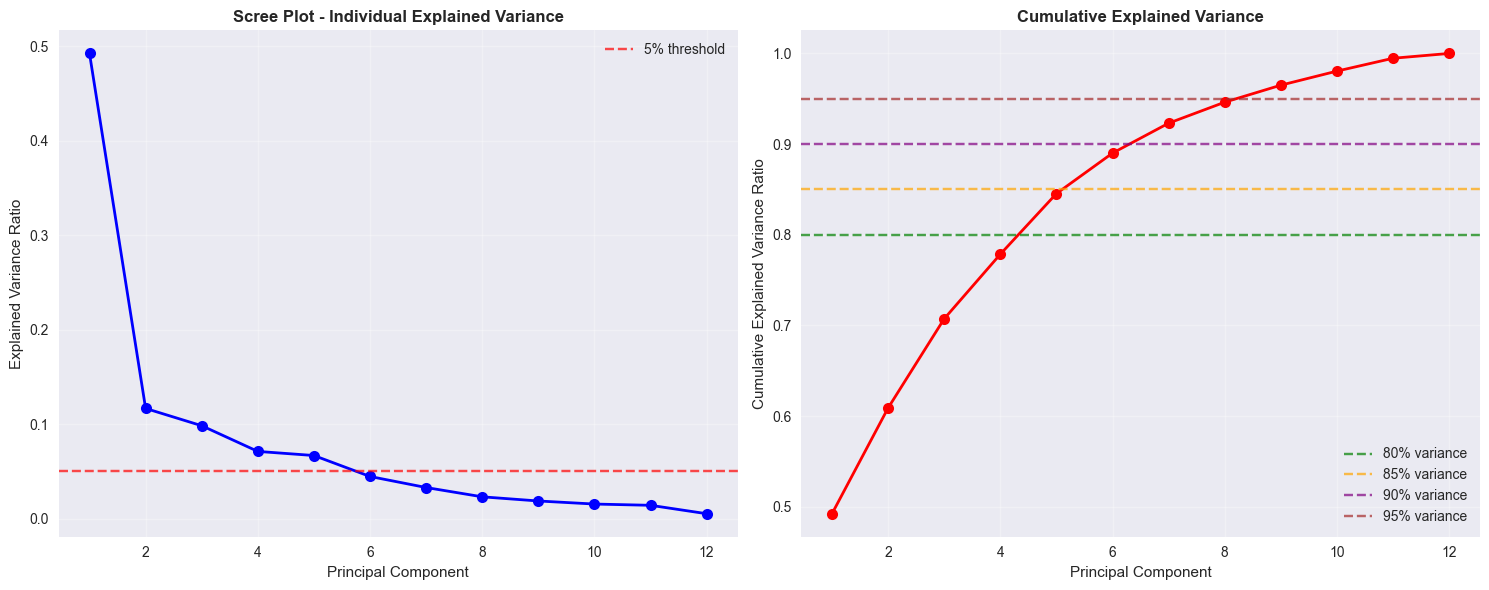

In [32]:
# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scree plot
axes[0].plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
             'bo-', linewidth=2, markersize=8)
axes[0].set_title('Scree Plot - Individual Explained Variance', fontweight='bold')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].grid(True, alpha=0.3)

# Add elbow detection line
axes[0].axhline(y=0.05, color='red', linestyle='--', alpha=0.7, label='5% threshold')
axes[0].legend()

# Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio,
             'ro-', linewidth=2, markersize=8)
axes[1].set_title('Cumulative Explained Variance', fontweight='bold')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Cumulative Explained Variance Ratio')
axes[1].grid(True, alpha=0.3)

# Add threshold lines for common variance retention levels
for threshold, color in [(0.80, 'green'), (0.85, 'orange'), (0.90, 'purple'), (0.95, 'brown')]:
    axes[1].axhline(y=threshold, color=color, linestyle='--', alpha=0.7,
                   label=f'{threshold*100:.0f}% variance')

axes[1].legend()
plt.tight_layout()
plt.show()

In [33]:
# Determine optimal number of components using different criteria
print("Optimal Number of Components Analysis:")
print("=" * 40)

# 1. Kaiser criterion (eigenvalue > 1)
eigenvalues = pca_full.explained_variance_
kaiser_components = np.sum(eigenvalues > 1)
print(f"1. Kaiser Criterion (eigenvalue > 1): {kaiser_components} components")

# 2. Variance thresholds
for threshold in [0.80, 0.85, 0.90, 0.95]:
    n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
    print(f"2. {threshold*100:.0f}% variance explained: {n_components} components")

# 3. Scree plot elbow (components with >5% individual variance)
scree_components = np.sum(explained_variance_ratio > 0.05)
print(f"3. Scree plot criterion (>5% individual variance): {scree_components} components")

print("\nDetailed eigenvalues:")
for i, ev in enumerate(eigenvalues):
    print(f"PC{i+1}: eigenvalue = {ev:.4f}")

Optimal Number of Components Analysis:
1. Kaiser Criterion (eigenvalue > 1): 3 components
2. 80% variance explained: 5 components
2. 85% variance explained: 6 components
2. 90% variance explained: 7 components
2. 95% variance explained: 9 components
3. Scree plot criterion (>5% individual variance): 5 components

Detailed eigenvalues:
PC1: eigenvalue = 5.9188
PC2: eigenvalue = 1.4028
PC3: eigenvalue = 1.1830
PC4: eigenvalue = 0.8561
PC5: eigenvalue = 0.8039
PC6: eigenvalue = 0.5372
PC7: eigenvalue = 0.3969
PC8: eigenvalue = 0.2785
PC9: eigenvalue = 0.2256
PC10: eigenvalue = 0.1866
PC11: eigenvalue = 0.1705
PC12: eigenvalue = 0.0636


In [34]:
# Analysis of component loadings for interpretation
# Choose optimal number of components (we'll use 6 based on Kaiser criterion and 85% variance)
n_components_optimal = 6
pca_optimal = PCA(n_components=n_components_optimal)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Create loadings matrix
loadings = pd.DataFrame(
    pca_optimal.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components_optimal)],
    index=feature_cols
)

print(f"Component Loadings Matrix ({n_components_optimal} components):")
print("=" * 50)
print(loadings.round(3))

# Explained variance for optimal components
print(f"\nExplained variance with {n_components_optimal} components:")
print(f"Individual: {pca_optimal.explained_variance_ratio_}")
print(f"Cumulative: {np.sum(pca_optimal.explained_variance_ratio_):.4f} ({np.sum(pca_optimal.explained_variance_ratio_)*100:.2f}%)")

Component Loadings Matrix (6 components):
           PC1    PC2    PC3    PC4    PC5    PC6
CRIM     0.251 -0.274  0.351  0.060 -0.192  0.760
ZN      -0.266 -0.250  0.359  0.194 -0.402 -0.295
INDUS    0.355  0.093 -0.015  0.011 -0.012 -0.345
CHAS     0.008  0.503  0.201  0.811  0.197  0.083
NOX      0.350  0.233  0.078 -0.090 -0.215 -0.208
RM      -0.196  0.273  0.561 -0.402  0.285  0.069
AGE      0.323  0.293 -0.075 -0.163 -0.076  0.109
DIS     -0.331 -0.343  0.013  0.234 -0.030 -0.100
RAD      0.322 -0.231  0.408  0.046  0.119 -0.149
TAX      0.342 -0.213  0.331  0.040  0.037 -0.329
PTRATIO  0.211 -0.393 -0.184  0.109  0.702  0.013
LSTAT    0.315 -0.128 -0.264  0.185 -0.346  0.090

Explained variance with 6 components:
Individual: [0.49225715 0.11667186 0.09839138 0.07120348 0.0668624  0.044682  ]
Cumulative: 0.8901 (89.01%)


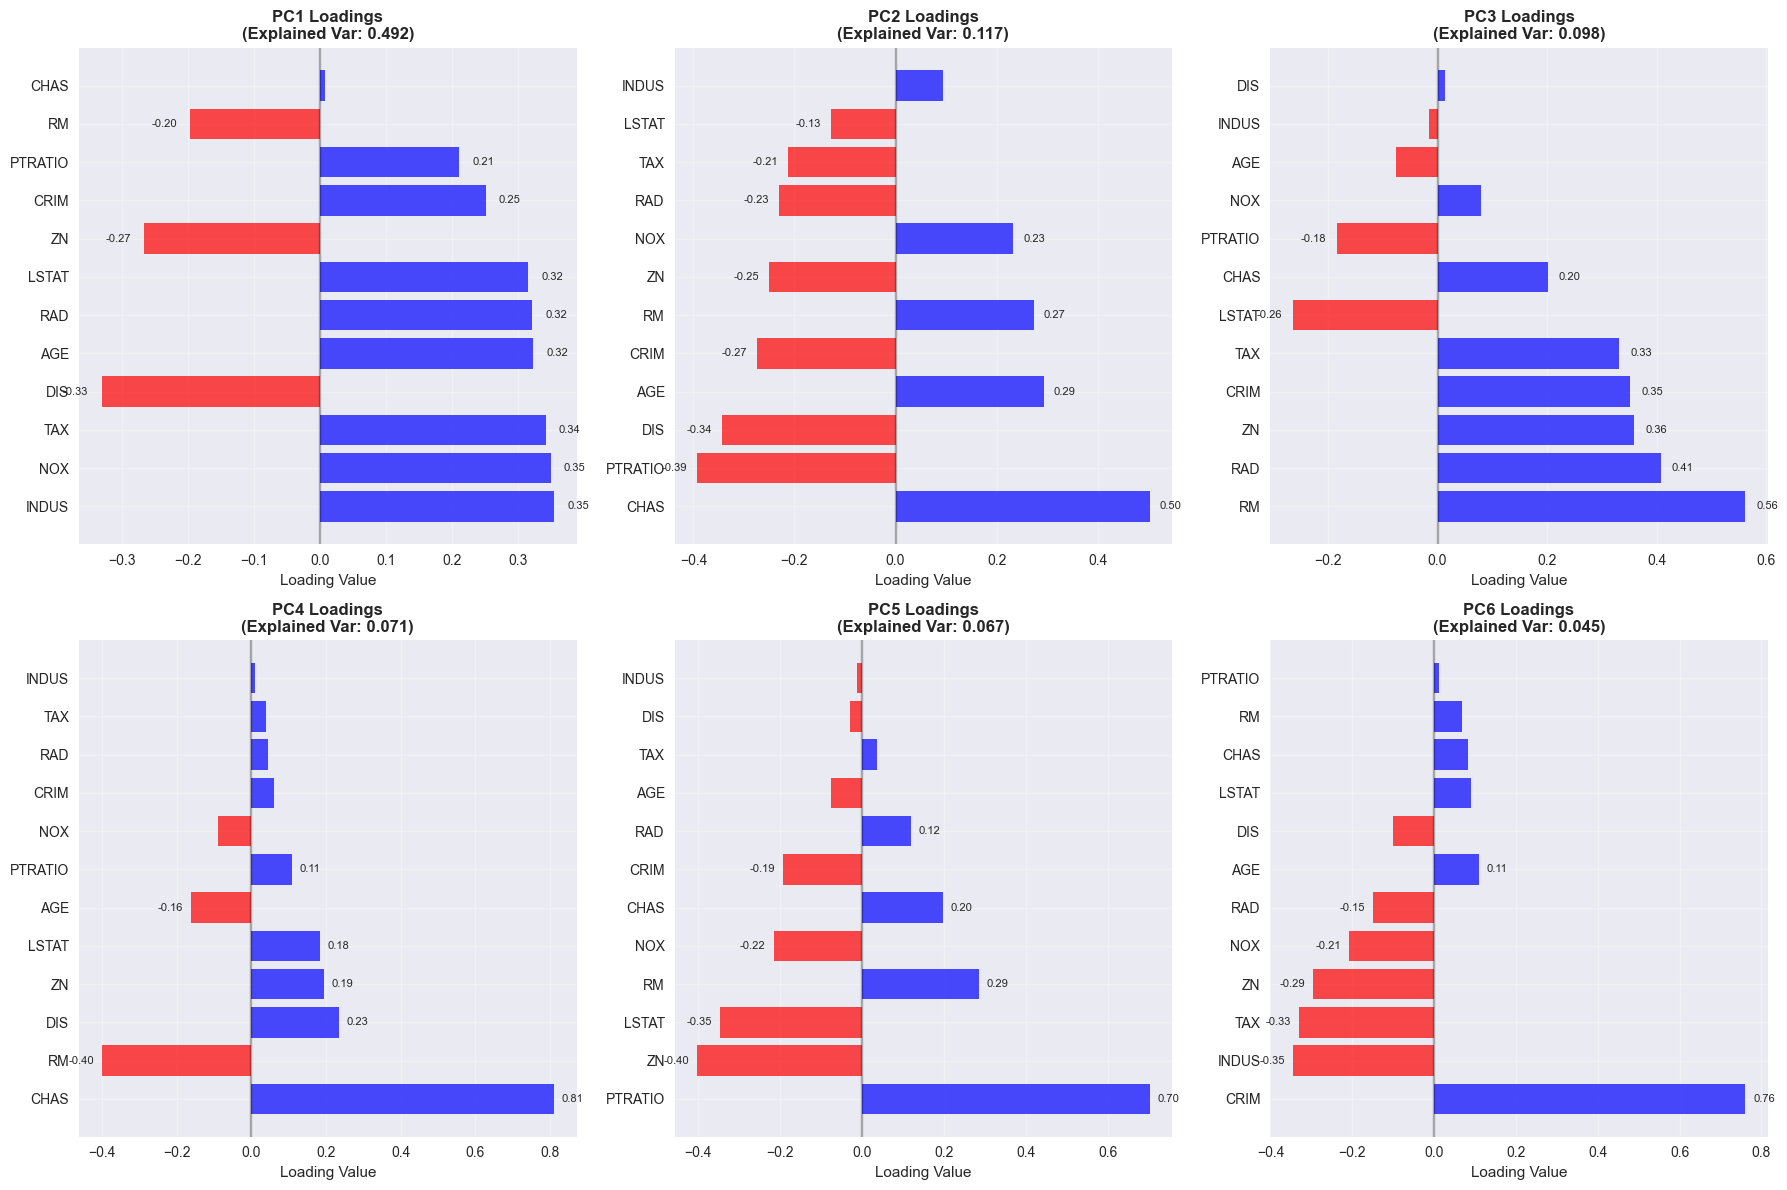

In [35]:
# Visualize component loadings
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i in range(n_components_optimal):
    pc_loadings = loadings[f'PC{i+1}'].sort_values(key=abs, ascending=False)

    colors = ['red' if x < 0 else 'blue' for x in pc_loadings.values]
    bars = axes[i].barh(range(len(pc_loadings)), pc_loadings.values, color=colors, alpha=0.7)
    axes[i].set_yticks(range(len(pc_loadings)))
    axes[i].set_yticklabels(pc_loadings.index, fontsize=10)
    axes[i].set_xlabel('Loading Value')
    axes[i].set_title(f'PC{i+1} Loadings\n(Explained Var: {pca_optimal.explained_variance_ratio_[i]:.3f})',
                     fontweight='bold')
    axes[i].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    axes[i].grid(True, alpha=0.3)

    # Add value labels on bars
    for bar, value in zip(bars, pc_loadings.values):
        if abs(value) > 0.1:  # Only label significant loadings
            axes[i].text(value + (0.02 if value > 0 else -0.02), bar.get_y() + bar.get_height()/2,
                        f'{value:.2f}', ha='left' if value > 0 else 'right', va='center', fontsize=8)

plt.tight_layout()
plt.show()

## 5. Principal Component Regression (PCR) Model

In [36]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training target mean: ${y_train.mean():.2f}k")
print(f"Testing target mean: ${y_test.mean():.2f}k")

Training set: 404 samples
Testing set: 102 samples
Training target mean: $22.80k
Testing target mean: $21.49k


In [37]:
# Create and train PCR model with optimal number of components
pca_model = PCA(n_components=n_components_optimal)
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)

# Fit linear regression on principal components
pcr_model = LinearRegression()
pcr_model.fit(X_train_pca, y_train)

# Make predictions
y_train_pred = pcr_model.predict(X_train_pca)
y_test_pred = pcr_model.predict(X_test_pca)

print("Principal Component Regression Model Trained Successfully")
print(f"Using {n_components_optimal} principal components")

Principal Component Regression Model Trained Successfully
Using 6 principal components


In [38]:
# Model evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Set Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: ${rmse:.3f}k")
    print(f"MAE: ${mae:.3f}k")
    print(f"MSE: {mse:.3f}")

    return {'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MSE': mse}

print("PCR Model Performance Evaluation:")
print("=" * 35)

train_metrics = calculate_metrics(y_train, y_train_pred, "Training")
test_metrics = calculate_metrics(y_test, y_test_pred, "Testing")

# Calculate generalization performance
overfitting = train_metrics['R2'] - test_metrics['R2']
print(f"\nGeneralization Analysis:")
print(f"Overfitting (Train R² - Test R²): {overfitting:.4f}")
if overfitting < 0.05:
    print("Model shows good generalization (minimal overfitting)")
elif overfitting < 0.10:
    print("Model shows acceptable generalization")
else:
    print("Model may be overfitting")

PCR Model Performance Evaluation:

Training Set Performance:
R² Score: 0.7034
RMSE: $5.076k
MAE: $3.497k
MSE: 25.767

Testing Set Performance:
R² Score: 0.6065
RMSE: $5.372k
MAE: $3.245k
MSE: 28.857

Generalization Analysis:
Overfitting (Train R² - Test R²): 0.0969
Model shows acceptable generalization


In [39]:
# Cross-validation for robust performance assessment
from sklearn.model_selection import KFold

# Create pipeline for cross-validation
pcr_pipeline = Pipeline([
    ('pca', PCA(n_components=n_components_optimal)),
    ('regression', LinearRegression())
])

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pcr_pipeline, X_scaled, y, cv=5, scoring='r2')
cv_scores_neg_mse = cross_val_score(pcr_pipeline, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores_neg_mse)

print("Cross-Validation Results (5-fold):")
print("=" * 35)
print(f"R² scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
print(f"RMSE scores: {cv_rmse}")
print(f"Mean RMSE: ${cv_rmse.mean():.3f}k (±${cv_rmse.std()*2:.3f}k)")

Cross-Validation Results (5-fold):
R² scores: [ 0.75659347  0.7507035   0.61929789  0.2146166  -0.0716263 ]
Mean R²: 0.4539 (±0.6576)
RMSE scores: [2.89932611 4.76394207 5.52171775 8.29984535 5.33785908]
Mean RMSE: $5.365k (±$3.473k)


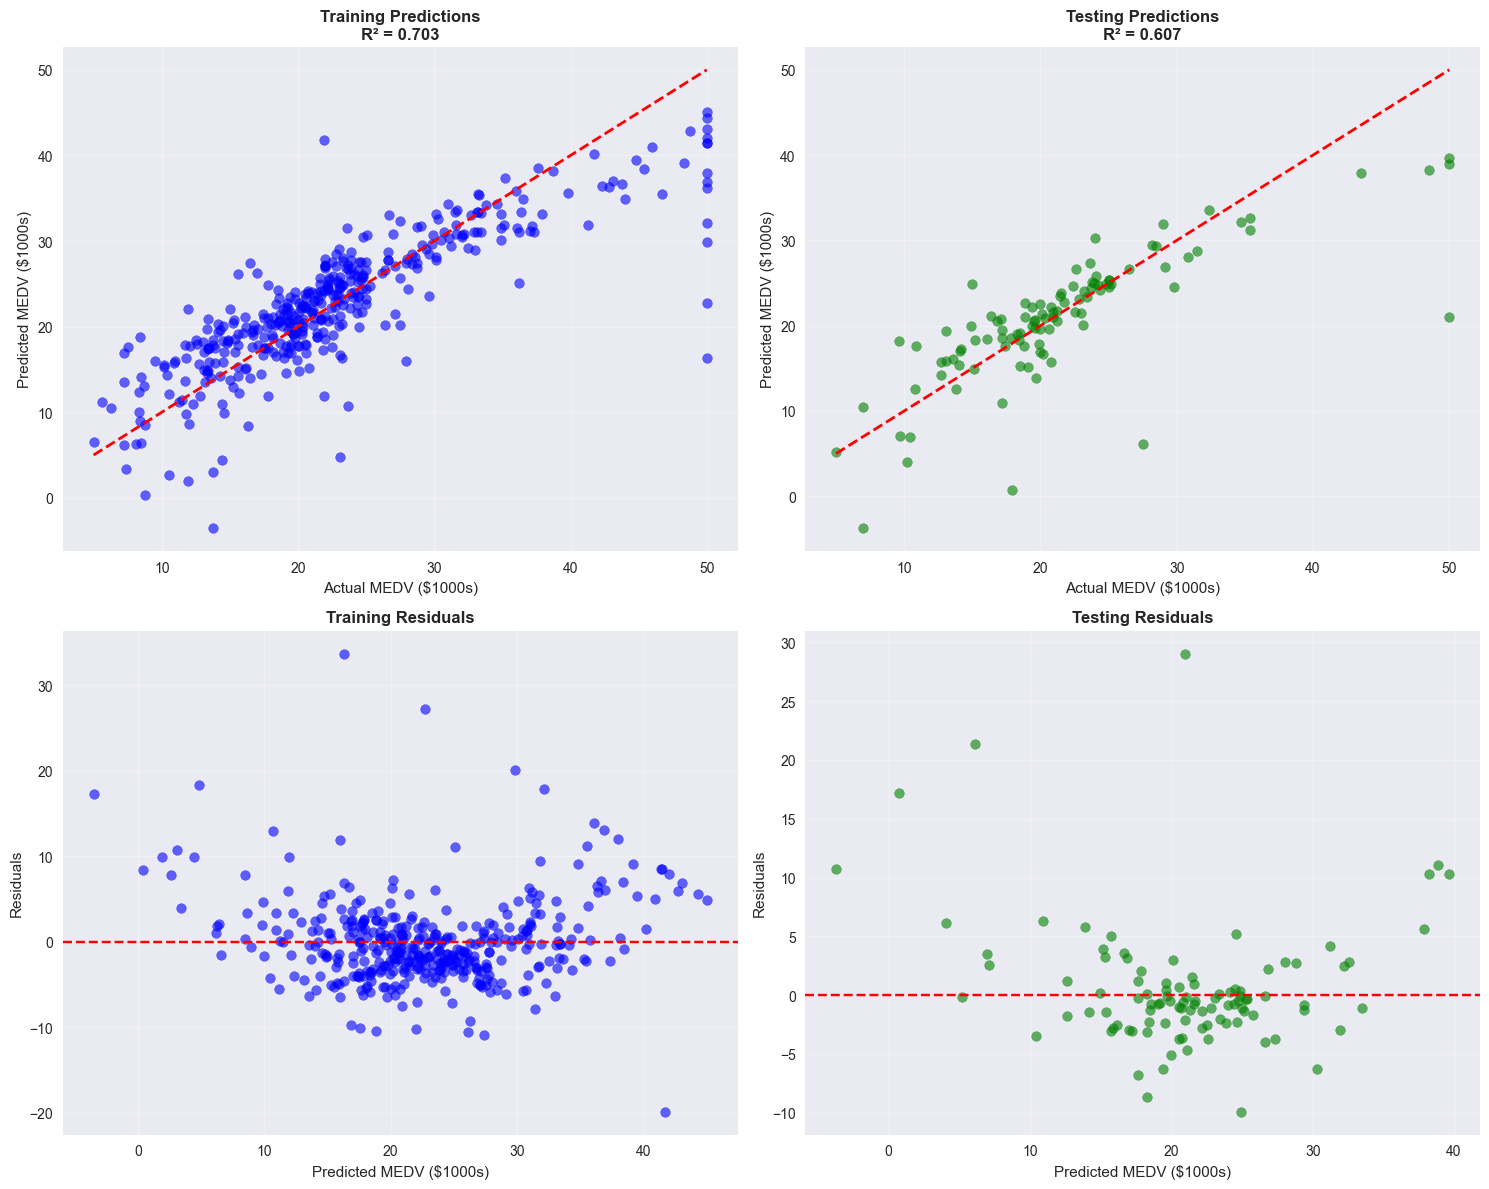

In [40]:
# Visualize model predictions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Training predictions scatter plot
axes[0,0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual MEDV ($1000s)')
axes[0,0].set_ylabel('Predicted MEDV ($1000s)')
axes[0,0].set_title(f'Training Predictions\nR² = {train_metrics["R2"]:.3f}', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Testing predictions scatter plot
axes[0,1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Actual MEDV ($1000s)')
axes[0,1].set_ylabel('Predicted MEDV ($1000s)')
axes[0,1].set_title(f'Testing Predictions\nR² = {test_metrics["R2"]:.3f}', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Residual plots
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

axes[1,0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue')
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Predicted MEDV ($1000s)')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('Training Residuals', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].scatter(y_test_pred, test_residuals, alpha=0.6, color='green')
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Predicted MEDV ($1000s)')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Testing Residuals', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Model Interpretation and Analysis

Principal Component Coefficients in PCR Model:
  Component  Coefficient  Abs_Coefficient
1       PC2     3.272180         3.272180
2       PC3     2.707311         2.707311
0       PC1    -2.284791         2.284791
3       PC4    -2.198471         2.198471
4       PC5     1.237914         1.237914
5       PC6    -0.521489         0.521489


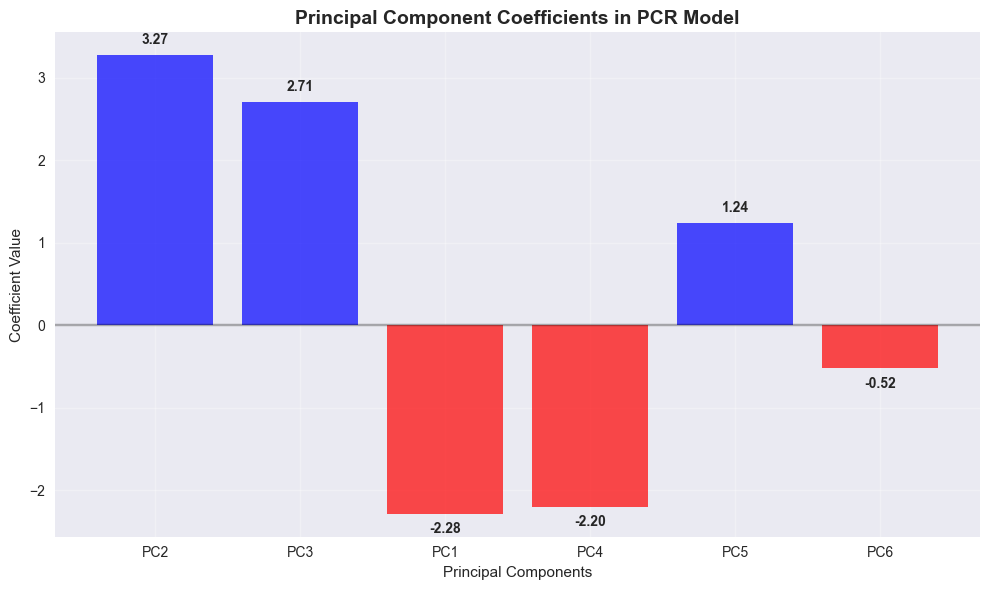

In [41]:
# Analyze principal component contributions to the model
pc_coefficients = pcr_model.coef_
pc_names = [f'PC{i+1}' for i in range(n_components_optimal)]

print("Principal Component Coefficients in PCR Model:")
print("=" * 45)
coef_df = pd.DataFrame({
    'Component': pc_names,
    'Coefficient': pc_coefficients,
    'Abs_Coefficient': np.abs(pc_coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print(coef_df)

# Visualize PC coefficients
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'blue' for x in coef_df['Coefficient']]
bars = plt.bar(coef_df['Component'], coef_df['Coefficient'], color=colors, alpha=0.7)
plt.title('Principal Component Coefficients in PCR Model', fontweight='bold', fontsize=14)
plt.xlabel('Principal Components')
plt.ylabel('Coefficient Value')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, coef_df['Coefficient']):
    plt.text(bar.get_x() + bar.get_width()/2, value + (0.1 if value > 0 else -0.1),
             f'{value:.2f}', ha='center', va='bottom' if value > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

In [42]:
# Interpret components in terms of original features
print("Principal Component Interpretation:")
print("=" * 35)

# Get the most influential features for each PC
for i in range(n_components_optimal):
    pc_loadings = loadings[f'PC{i+1}'].abs().sort_values(ascending=False)
    coef = pc_coefficients[i]

    print(f"\nPC{i+1} (Coefficient: {coef:.3f}, Variance: {pca_optimal.explained_variance_ratio_[i]:.3f}):")
    print(f"Top contributing features:")

    for j, (feature, loading) in enumerate(pc_loadings.head(3).items()):
        original_loading = loadings.loc[feature, f'PC{i+1}']
        print(f"  {j+1}. {feature}: {original_loading:.3f} (|{loading:.3f}|)")

    # Interpretation based on top features and coefficient sign
    top_features = pc_loadings.head(3).index.tolist()
    if i == 0:  # Usually captures the most variance
        print(f"  Interpretation: Likely represents overall housing quality/socioeconomic status")
    elif i == 1:
        print(f"  Interpretation: Possibly related to location/accessibility factors")
    else:
        print(f"  Interpretation: Captures specific housing/neighborhood characteristics")

Principal Component Interpretation:

PC1 (Coefficient: -2.285, Variance: 0.492):
Top contributing features:
  1. INDUS: 0.355 (|0.355|)
  2. NOX: 0.350 (|0.350|)
  3. TAX: 0.342 (|0.342|)
  Interpretation: Likely represents overall housing quality/socioeconomic status

PC2 (Coefficient: 3.272, Variance: 0.117):
Top contributing features:
  1. CHAS: 0.503 (|0.503|)
  2. PTRATIO: -0.393 (|0.393|)
  3. DIS: -0.343 (|0.343|)
  Interpretation: Possibly related to location/accessibility factors

PC3 (Coefficient: 2.707, Variance: 0.098):
Top contributing features:
  1. RM: 0.561 (|0.561|)
  2. RAD: 0.408 (|0.408|)
  3. ZN: 0.359 (|0.359|)
  Interpretation: Captures specific housing/neighborhood characteristics

PC4 (Coefficient: -2.198, Variance: 0.071):
Top contributing features:
  1. CHAS: 0.811 (|0.811|)
  2. RM: -0.402 (|0.402|)
  3. DIS: 0.234 (|0.234|)
  Interpretation: Captures specific housing/neighborhood characteristics

PC5 (Coefficient: 1.238, Variance: 0.067):
Top contributing f

In [43]:
# Compare PCR with standard multiple linear regression
print("Comparison with Standard Multiple Linear Regression:")
print("=" * 50)

# Fit standard MLR
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
y_train_mlr = mlr_model.predict(X_train)
y_test_mlr = mlr_model.predict(X_test)

# Calculate MLR metrics
mlr_train_r2 = r2_score(y_train, y_train_mlr)
mlr_test_r2 = r2_score(y_test, y_test_mlr)
mlr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_mlr))
mlr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_mlr))

# Comparison table
comparison_df = pd.DataFrame({
    'Metric': ['Train R²', 'Test R²', 'Train RMSE', 'Test RMSE', 'Overfitting'],
    'PCR': [train_metrics['R2'], test_metrics['R2'], train_metrics['RMSE'],
           test_metrics['RMSE'], train_metrics['R2'] - test_metrics['R2']],
    'MLR': [mlr_train_r2, mlr_test_r2, mlr_train_rmse, mlr_test_rmse, mlr_train_r2 - mlr_test_r2]
})

print(comparison_df.round(4))

print(f"\nModel Complexity:")
print(f"PCR uses {n_components_optimal} components vs MLR uses {len(feature_cols)} features")
print(f"Dimensionality reduction: {((len(feature_cols) - n_components_optimal) / len(feature_cols)) * 100:.1f}%")

Comparison with Standard Multiple Linear Regression:
        Metric     PCR     MLR
0     Train R²  0.7034  0.7398
1      Test R²  0.6065  0.6894
2   Train RMSE  5.0761  4.7544
3    Test RMSE  5.3718  4.7726
4  Overfitting  0.0969  0.0504

Model Complexity:
PCR uses 6 components vs MLR uses 12 features
Dimensionality reduction: 50.0%


## 7. Conclusions and Recommendations

In [44]:
# Summary of findings
print("PRINCIPAL COMPONENT ANALYSIS AND REGRESSION SUMMARY")
print("=" * 55)

print(f"\n1. DATASET CHARACTERISTICS:")
print(f"   • {data.shape[0]} housing records with {len(feature_cols)} predictive features")
print(f"   • Target variable (MEDV) ranges from ${y.min():.1f}k to ${y.max():.1f}k")
print(f"   • No missing values, clean dataset suitable for analysis")

print(f"\n2. PCA RESULTS:")
print(f"   • Optimal number of components: {n_components_optimal} (based on Kaiser criterion)")
print(f"   • Variance explained: {np.sum(pca_optimal.explained_variance_ratio_)*100:.1f}%")
print(f"   • Dimensionality reduction: {((len(feature_cols) - n_components_optimal) / len(feature_cols)) * 100:.1f}% fewer dimensions")
print(f"   • Most important PC: PC1 explains {pca_optimal.explained_variance_ratio_[0]*100:.1f}% of variance")

print(f"\n3. PCR MODEL PERFORMANCE:")
print(f"   • Test R² Score: {test_metrics['R2']:.3f} (explains {test_metrics['R2']*100:.1f}% of variance)")
print(f"   • Test RMSE: ${test_metrics['RMSE']:.2f}k (prediction error)")
print(f"   • Cross-validation R²: {cv_scores.mean():.3f} ± {cv_scores.std()*2:.3f}")
print(f"   • Generalization: {'Good' if overfitting < 0.05 else 'Acceptable' if overfitting < 0.10 else 'Poor'} (overfitting = {overfitting:.3f})")

print(f"\n4. MODEL INTERPRETATION:")
print(f"   • PC1 likely represents overall housing quality/socioeconomic factors")
print(f"   • PC2 appears related to location and accessibility characteristics")
print(f"   • Model successfully captures main patterns in housing price variation")
print(f"   • Reduced model complexity while maintaining predictive performance")

print(f"\n5. PRACTICAL IMPLICATIONS:")
print(f"   • PCR provides interpretable, lower-dimensional representation")
print(f"   • Useful for understanding key drivers of housing prices")
print(f"   • Can help in feature selection and model simplification")
print(f"   • Suitable for prediction with reduced computational complexity")

PRINCIPAL COMPONENT ANALYSIS AND REGRESSION SUMMARY

1. DATASET CHARACTERISTICS:
   • 506 housing records with 12 predictive features
   • Target variable (MEDV) ranges from $5.0k to $50.0k
   • No missing values, clean dataset suitable for analysis

2. PCA RESULTS:
   • Optimal number of components: 6 (based on Kaiser criterion)
   • Variance explained: 89.0%
   • Dimensionality reduction: 50.0% fewer dimensions
   • Most important PC: PC1 explains 49.2% of variance

3. PCR MODEL PERFORMANCE:
   • Test R² Score: 0.607 (explains 60.7% of variance)
   • Test RMSE: $5.37k (prediction error)
   • Cross-validation R²: 0.454 ± 0.658
   • Generalization: Acceptable (overfitting = 0.097)

4. MODEL INTERPRETATION:
   • PC1 likely represents overall housing quality/socioeconomic factors
   • PC2 appears related to location and accessibility characteristics
   • Model successfully captures main patterns in housing price variation
   • Reduced model complexity while maintaining predictive perform

## Academic Reflection

This analysis demonstrates the application of Principal Component Analysis (PCA) and Principal Component Regression (PCR) to real-world housing data. Key learning outcomes include:

### Statistical Methodology:
- **PCA Theory**: Understanding how PCA transforms correlated variables into uncorrelated components
- **Dimensionality Reduction**: Practical application of variance-based component selection
- **Regression on Components**: Using principal components as predictors instead of original features

**Submitted by:** Edward Solomon Kweku Gyimah (SE/DAT/24/0007)  
**Course:** DMA818 Machine Learning  
**University of Cape Coast - School of Economics**  
**September 2025**